In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
df.shape

(583, 11)

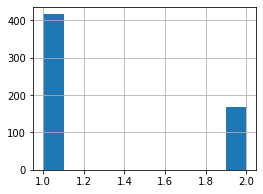

In [ ]:
df['Dataset'].hist(figsize =(4, 3))
plt.show()

In [ ]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
df=df.drop(['Gender'],axis=1)
X=df.drop(['Dataset'],axis=1)
Y=df['Dataset']

In [ ]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)
X[:5]

array([[ 1.24740264, -0.42031984, -0.49541415, -0.42887006, -0.35583241,
        -0.31911128,  0.29372174,  0.20344649, -0.14738974],
       [ 1.06230624,  1.21893587,  1.42351783,  1.67508295, -0.09357256,
        -0.03596174,  0.93965456,  0.07746198, -0.64846078],
       [ 1.06230624,  0.64037503,  0.92601694,  0.81624275, -0.11542755,
        -0.14645913,  0.47827397,  0.20344649, -0.17870668],
       [ 0.81551105, -0.37210644, -0.38880682, -0.44941648, -0.3667599 ,
        -0.3122052 ,  0.29372174,  0.329431  ,  0.16577966],
       [ 1.67929422,  0.09395646,  0.17976562, -0.3959958 , -0.29573119,
        -0.17753651,  0.75510233, -0.9304141 , -1.71323673]])

In [ ]:
#Traing Testing Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4)

KNN

In [ ]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#Accuracy KNN
from sklearn.metrics import accuracy_score
print("Training Accuracy KNN : ",knn.score(X_train,Y_train)) 
print("Testing Accuracy KNN : ",accuracy_score(Y_test,y_pred))
knn.score(X_train,Y_train)

Training Accuracy KNN :  0.7204610951008645
Testing Accuracy KNN :  0.7025862068965517


0.7204610951008645

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred_lr = LR.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_lr)
print(cm)

[[156   5]
 [ 66   5]]


In [ ]:
print("Train accuracy Logistic Regression : ",LR.score(X_train,Y_train)) 
print("Test accuracy Logistic Regression : ",LR.score(X_test,Y_test))

Train accuracy Logistic Regression :  0.7550432276657061
Test accuracy Logistic Regression :  0.6939655172413793
